In [1]:
import pandas as pd
import numpy as np
import numpy.linalg as linalg
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def add_labels(x_list, y_list, labels):
    for x, y, label in zip(x_list, y_list, labels):
        plt.text(x+0.25, y-0.25, label)

# Représentation euclidienne
## Représentation des données

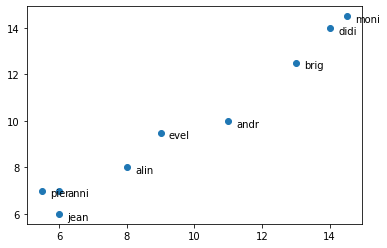

In [3]:
# Q1
notes = pd.read_csv("TP03_Representation_euclidienne_des_donnees/data/notes.txt", sep="\s+")
plt.scatter(notes.math, notes.scie)
add_labels(notes.math, notes.scie, notes.index)
plt.show()

### Analyse et représentation succinctes

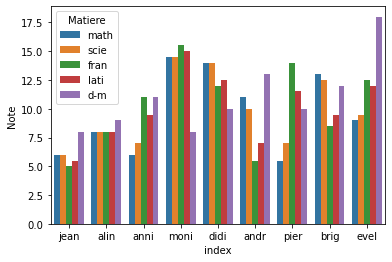

In [4]:
# Q2.1
notes0 = notes.reset_index()
notes_melt = notes0.melt(id_vars=["index"], var_name="Matiere", value_name="Note")
sns.barplot(x="index", y="Note", hue="Matiere", data=notes_melt)
plt.show()

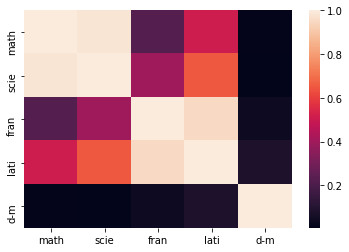

In [5]:
# Q2.2
corr = notes.corr()
sns.heatmap(corr)
plt.show()

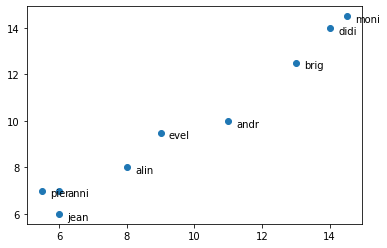

In [6]:
# Q3.1
plt.scatter(notes.math, notes.scie)
add_labels(notes.math, notes.scie, notes.index)
plt.show()

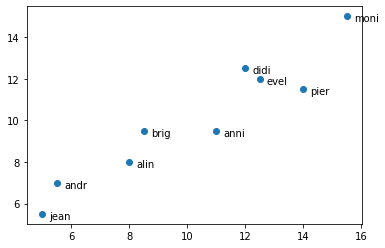

In [7]:
# Q3.2
plt.scatter(notes.fran, notes.lati)
add_labels(notes.fran, notes.lati, notes.index)
plt.show()

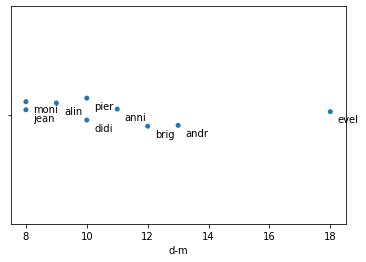

In [48]:
ax = sns.stripplot(x=notes["d-m"])
loc = ax.get_children()[0].get_offsets().data
add_labels(loc[:,0], loc[:,1]+0.3, notes.index)
plt.show()

In [44]:
ax.get_children()[0].get_offsets()

masked_array(
  data=[[8.0, 0.06755658816658366],
        [9.0, 0.03821845855715611],
        [11.0, -0.01021514064686442],
        [8.0, 0.04015817291640847],
        [10.0, -0.020827396385260766],
        [13.0, 0.006428654387938465],
        [10.0, 0.09788547575221437],
        [12.0, -0.026230487819828507],
        [18.0, -0.08786926567744105]],
  mask=[[False, False],
        [False, False],
        [False, False],
        [False, False],
        [False, False],
        [False, False],
        [False, False],
        [False, False],
        [False, False]],
  fill_value=1e+20)

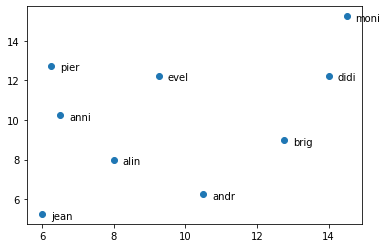

In [9]:
# Q4
plt.scatter((notes.math + notes.scie) / 2, (notes.fran + notes.lati) / 2)
add_labels((notes.math + notes.scie) / 2, (notes.fran + notes.lati) / 2, notes.index)
plt.show()

### Projection et qualité de représentation
##### Exercises

## Choix d’une représentation

In [10]:
# Q8
Xc = notes[['math', 'scie', 'fran', 'lati', 'd-m']].to_numpy()
C = np.cov(Xc, bias=True, rowvar=False)
np.diag(C).sum()

48.97530864197531

In [11]:
# Q9
A1 = np.array([[0.5, 0, 0.5, 0, 0],
                [0.5, 0, -0.5, 0, 0],
                [0, 0.5, 0, 0.5, 0],
                [0, 0.5, 0, -0.5, 0],
                [0, 0, 0, 0, 1]])
C1 = np.cov(Xc @ linalg.inv(A1).T, bias=True, rowvar=False)
np.diag(C1).sum()

89.28395061728395

In [12]:
linalg.inv(A1).T

array([[ 1.,  0.,  1.,  0.,  0.],
       [ 1.,  0., -1.,  0.,  0.],
       [ 0.,  1., -0.,  1.,  0.],
       [ 0.,  1., -0., -1.,  0.],
       [ 0.,  0., -0.,  0.,  1.]])

In [13]:
# Q11
from math import sqrt
r = sqrt(2)/2
B1 = np.array([[r, 0, r, 0, 0],
                [r, 0, -r, 0, 0],
                [0, r, 0, r, 0],
                [0, r, 0, -r, 0],
                [0, 0, 0, 0, 1]])
C1 = np.cov(Xc @ B1, bias=True, rowvar=False)
np.diag(C1).sum()

48.97530864197531

In [14]:
linalg.inv(B1).T

array([[ 0.70710678,  0.        ,  0.70710678,  0.        ,  0.        ],
       [ 0.70710678,  0.        , -0.70710678,  0.        ,  0.        ],
       [ 0.        ,  0.70710678, -0.        ,  0.70710678,  0.        ],
       [ 0.        ,  0.70710678, -0.        , -0.70710678,  0.        ],
       [ 0.        ,  0.        , -0.        ,  0.        ,  1.        ]])

In [15]:
B2 = np.array([[r, 0, r, 0, 0],
                [0, r, 0, r, 0],
                [r, 0, -r, 0, 0],
                [0, r, 0, -r, 0],
                [0, 0, 0, 0, 1]])
C2 = np.cov(Xc @ B2, bias=True, rowvar=False)
np.diag(C2).sum()

48.9753086419753

In [16]:
np.diag(C)

array([11.38888889,  8.94444444, 12.0617284 ,  7.91358025,  8.66666667])

In [17]:
np.diag(C1)

array([20.08333333, 19.2808642 ,  0.25      ,  0.69444444,  8.66666667])

In [18]:
np.diag(C2)

array([14.38271605, 13.91049383,  9.06790123,  2.94753086,  8.66666667])

Q11
Axe 1 Axe 2 Axe 3 Axe 4 Axe 5
Canonique 11.388889 8.944444 12.061728 7.913580 8.666667
B1 20.083333 19.280864 0.250000 0.694444 8.666667
B2 14.382716 13.910494 9.067901 2.947531 8.666667
Et en pourcentage
Axe 1 Axe 2 Axe 3 Axe 4 Axe 5
Canonique 23.254348 18.263171 24.628183 16.158306 17.695992
B1 41.007058 39.368540 0.510461 1.417948 17.695992
B2 29.367280 28.403075 18.515251 6.018402 17.695992

In [19]:
# Q12
B3 = 1/2 * np.array([[1, 1, 1, 1, 0],
                    [1, 1, -1, -1, 0],
                    [1, -1, -1, 1, 0],
                    [1, -1, 1, -1, 0],
                    [0, 0, 0, 0, 2]])
C3 = np.cov(Xc @ B3, bias=True, rowvar=False)
np.diag(C3).sum()

48.9753086419753

In [20]:
print(np.diag(C3)[:2].sum())
print(np.diag(C1)[:2].sum())
print(np.diag(C3)[:2])
print(np.diag(C1)[:2])

39.364197530864196
39.3641975308642
[28.22376543 11.1404321 ]
[20.08333333 19.2808642 ]


#  Inertie cumulée enveloppante

In [21]:
# Q13
def random_cumsums():
    U, _ = linalg.qr(np.random.randn(5, 5))
    C = np.cov(Xc @ U, bias=True, rowvar=False)
    return np.cumsum(np.diag(C))

In [22]:
# Q14
data = [random_cumsums() for i in range(20)]
X0 = pd.DataFrame(data, columns=[f"Axe {i+1}" for i in range(5)])
X0.index.name = "Base"
X0 = X0.reset_index()
X0 = X0.melt(id_vars="Base", var_name="Axe", value_name="Inertie Cumulée")
print(X0)

    Base    Axe  Inertie Cumulée
0      0  Axe 1        15.639141
1      1  Axe 1        20.197984
2      2  Axe 1         4.793104
3      3  Axe 1         1.626899
4      4  Axe 1        11.368571
..   ...    ...              ...
95    15  Axe 5        48.975309
96    16  Axe 5        48.975309
97    17  Axe 5        48.975309
98    18  Axe 5        48.975309
99    19  Axe 5        48.975309

[100 rows x 3 columns]


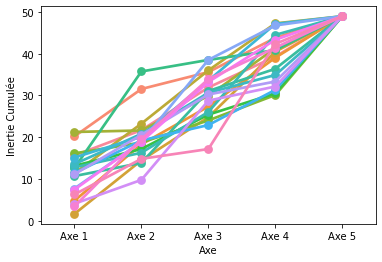

In [23]:
# Q15
ax = sns.pointplot(x="Axe", y="Inertie Cumulée", hue="Base", data=X0, legend=False)
ax.get_legend().remove()
plt.show()

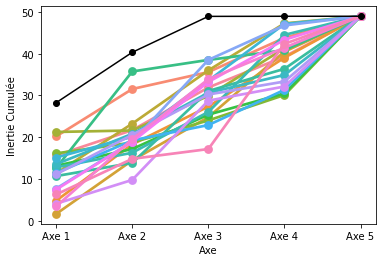

In [34]:
# Q16
Bx = np.array([[0.515, -0.567, 0.051, -0.289, -0.573],
                [0.507, -0.372, 0.014, 0.553, 0.546],
                [0.492, 0.65, -0.108, 0.394, -0.41],
                [0.485, 0.323, -0.023, -0.674, 0.453],
                [0.031, 0.113, 0.992, 0.034, -0.013]])

ax = sns.pointplot(x="Axe", y="Inertie Cumulée", hue="Base", data=X0, legend=False)
ax.get_legend().remove()
C = np.cov(Xc @ Bx, bias=True, rowvar=False)
csx = np.cumsum(np.diag(C))
ax.plot(range(5), csx, 'k-o', zorder=20)
plt.show()

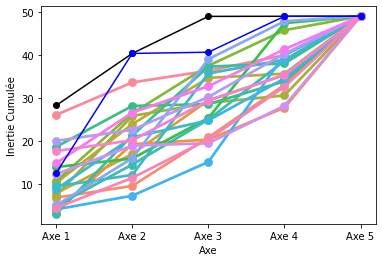

In [42]:
# Q17
from scipy.linalg import block_diag
A, _ = linalg.qr(np.random.randn(2, 2))
By = Bx @ block_diag(A, A, 1)

ax = sns.pointplot(x="Axe", y="Inertie Cumulée", hue="Base", data=X0, legend=False)
ax.get_legend().remove()

C = np.cov(Xc @ Bx, bias=True, rowvar=False)
csx = np.cumsum(np.diag(C))
ax.plot(range(5), csx, 'k-o', zorder=100)

C = np.cov(Xc @ By, bias=True, rowvar=False)
csy = np.cumsum(np.diag(C))
ax.plot(range(5), csy, 'b-o', zorder=100) # noouput

In [ ]:
csx

In [ ]:
csy

In [ ]:
A[0,0]**2 * csx[0] + A[1,0]**2 * (csx[1]-csx[0]) + A[0,1]**2 * csx[0] + (A[1,1]**2 * (csx[1]-csx[0]))

In [ ]:
A[0,0]**2 * (csx[2]-csx[1]) + A[1,0]**2 * (csx[3]-csx[2]) + A[0,1]**2 * (csx[2]-csx[1]) + (A[1,1]**2 * (csx[3]-csx[2]))

In [ ]:
csx[3] - csx[1]

In [35]:
A, _ = linalg.qr(np.random.randn(3, 3))

In [37]:
(A**2).sum(axis=1)

array([1., 1., 1.])

# Inertie par rapport à un axe

In [ ]:
# Q18
n, p = 100, 2
X = np.random.randn(n, p)
feat_metric = np.eye(p)
sample_metric = 1 / n * np.eye(n)